In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.markers import MarkerStyle
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm

#File to Load
sales_csv = Path("Resources/vgsales.csv")

#Read sales data file and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)

In [2]:
## Data Cleaning

In [3]:
#drop rank value which was based on global sales
sales_data = sales_data.drop(columns="Rank")

In [4]:
#Establish console Company as a column
sales_data['Platform Company'] = sales_data['Platform']

In [5]:
#Merge different consoles into a joint parent company
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")

#view list of Platform Companies
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [6]:
#Group similar genres to reduce total genre numbers
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [7]:
#Identify any null values in Year Column
sales_data["Year"].isnull().sum()

271

In [8]:
#drop games with null year creating a new dataframe
sales_data_clean = sales_data.dropna(subset=["Year"]).copy()

In [9]:
#convert years to integers to drop unwanted decimal place
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

In [10]:
#remove years that are not usable in the analysis
mask1 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(mask1, inplace=True)

In [11]:
year_2017 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(year_2017, inplace=True)

In [12]:
year_2020 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(year_2020, inplace=True)

In [13]:
#create an alphabetical list of the genres to sync with the color schemes in the visualisations
genre_name = []

for x in sales_data_clean["Genre"]:
    
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()

In [14]:
## Line Graph Sales by Year

In [15]:
#Data Frame for comparing total sales by region
world = sales_data_clean.groupby("Year")["Global_Sales"].sum()
NA = sales_data_clean.groupby("Year")["NA_Sales"].sum()
JP = sales_data_clean.groupby("Year")["JP_Sales"].sum()
EU = sales_data_clean.groupby("Year")["EU_Sales"].sum()
other = sales_data_clean.groupby("Year")["Other_Sales"].sum()

df2 = pd.DataFrame(
    {
        "Global" : world,
        "NA" : NA,
        "JP" : JP,
        "EU" : EU,
        "Other" : other
    }
)

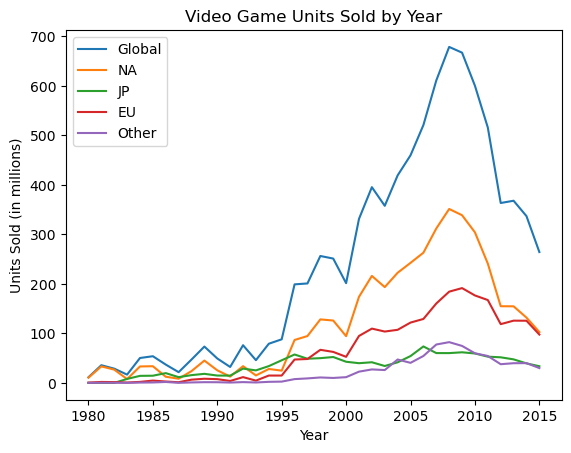

In [16]:
#line Graph including global
plt.plot(df2.index, df2["Global"], label = "Global")
plt.plot(df2.index, df2["NA"], label = "NA")
plt.plot(df2.index, df2["JP"], label = "JP")
plt.plot(df2.index, df2["EU"], label = "EU")
plt.plot(df2.index, df2["Other"], label = "Other")

plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")
plt.legend()
plt.title("Video Game Units Sold by Year")

plt.show()

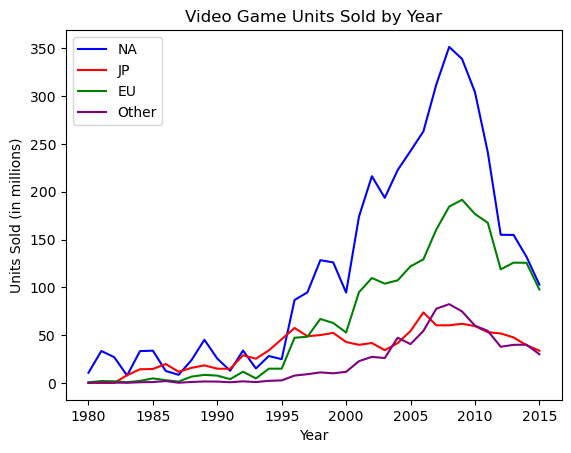

In [17]:
#line graph excluding global

# plt.plot(df2.index, df2["Global"], label = "Global")
plt.plot(df2.index, df2["NA"], label = "NA", color="blue")
plt.plot(df2.index, df2["JP"], label = "JP", color="red")
plt.plot(df2.index, df2["EU"], label = "EU", color="green")
plt.plot(df2.index, df2["Other"], label = "Other", color="purple")

plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")
plt.legend()
plt.title("Video Game Units Sold by Year")

plt.show()

In [18]:
## Binning by Decade

In [19]:
#bin the years into decades to create a new dataframe for comparison
bins = [1980, 1990, 2000, 2010, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

sales_decade = sales_data_clean.copy()

sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2000s


In [20]:
## Box Plot, Quartiles and Outliers

There were 3133 total Action games.
With an IQR of 0.25, there are 308 outliers that sold greater than 0.64 units.
9.8% of total Action games were outliers.

There were 2108 total Adventure games.
With an IQR of 0.18, there are 255 outliers that sold greater than 0.45 units.
12.1% of total Adventure games were outliers.

There were 822 total Fighting games.
With an IQR of 0.29, there are 88 outliers that sold greater than 0.72 units.
10.7% of total Fighting games were outliers.

There were 1692 total Misc games.
With an IQR of 0.21, there are 160 outliers that sold greater than 0.52 units.
9.5% of total Misc games were outliers.

There were 1232 total Puzzle & Strategy games.
With an IQR of 0.11, there are 140 outliers that sold greater than 0.28 units.
11.4% of total Puzzle & Strategy games were outliers.

There were 1429 total Role-Playing games.
With an IQR of 0.17, there are 162 outliers that sold greater than 0.43 units.
11.3% of total Role-Playing games were outliers.

There were

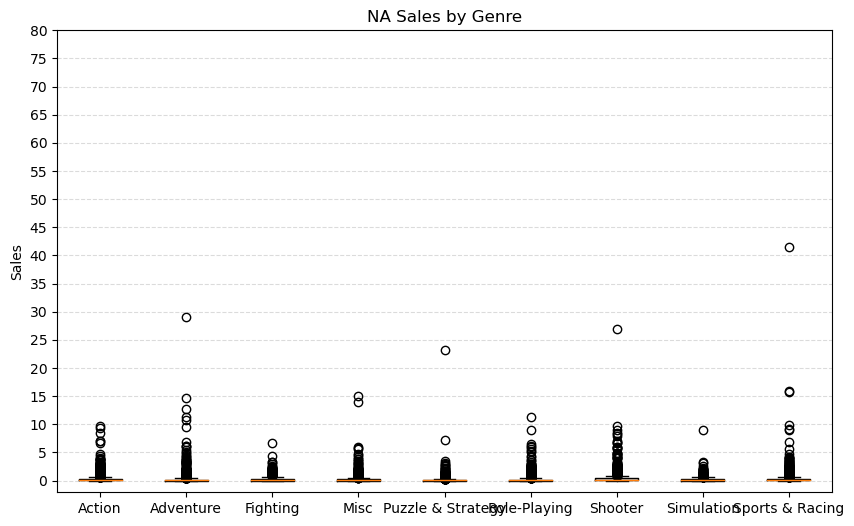

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for NA_Sales
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows based by genre and NA_Sales
    sales_total = sales_decade.loc[sales_decade["Genre"] == genre, "NA_Sales"]
  
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")

#Create a box plot for the data
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,85,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title("NA Sales by Genre")
plt.show()

There were 68 total Action games.
With an IQR of 0.41, there are 8 outliers that sold greater than 1.3 units.
11.799999999999999% of total Action games were outliers.

There were 38 total Adventure games.
With an IQR of 0.78, there are 6 outliers that sold greater than 2.34 units.
15.8% of total Adventure games were outliers.

There were 3 total games
With an IQR of 1.01, there were no potential outliers.
There were 4 total Misc games.
With an IQR of 0.21, there are 1 outliers that sold greater than 0.53 units.
25.0% of total Misc games were outliers.

There were 21 total Puzzle & Strategy games.
With an IQR of 1.27, there are 2 outliers that sold greater than 3.44 units.
9.5% of total Puzzle & Strategy games were outliers.

There were 11 total Role-Playing games.
With an IQR of 0.12, there are 2 outliers that sold greater than 0.31 units.
18.2% of total Role-Playing games were outliers.

There were 28 total Shooter games.
With an IQR of 0.68, there are 1 outliers that sold greater tha

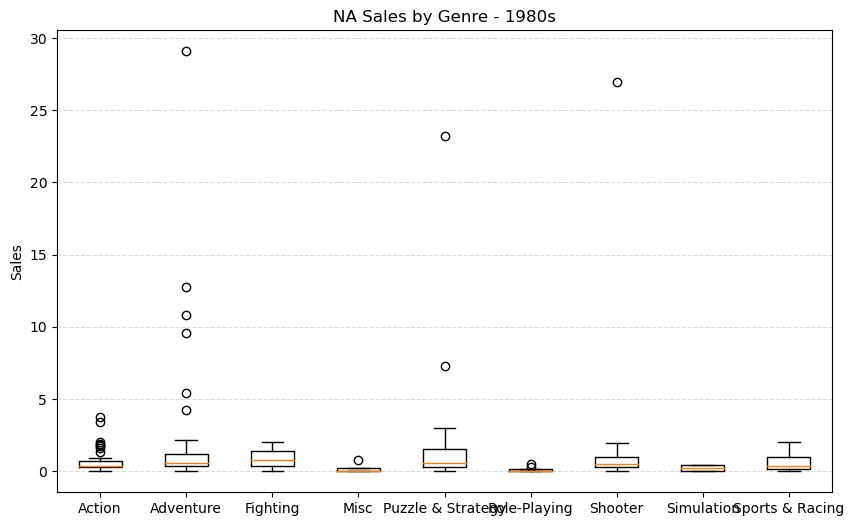

In [22]:
#Data for the 1980s
sales_decade_1980 = sales_decade.loc[sales_decade["Decade"] == "1980s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows based by genre and NA_Sales
    sales_total = sales_decade_1980.loc[sales_decade_1980["Genre"] == genre, "NA_Sales"]
    
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,35,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title("NA Sales by Genre - 1980s")
plt.show()

There were 203 total Action games.
With an IQR of 0.37, there are 28 outliers that sold greater than 0.95 units.
13.8% of total Action games were outliers.

There were 259 total Adventure games.
With an IQR of 0.45, there are 33 outliers that sold greater than 1.12 units.
12.7% of total Adventure games were outliers.

There were 222 total Fighting games.
With an IQR of 0.26, there are 32 outliers that sold greater than 0.66 units.
14.399999999999999% of total Fighting games were outliers.

There were 136 total Misc games.
With an IQR of 0.24, there are 22 outliers that sold greater than 0.59 units.
16.2% of total Misc games were outliers.

There were 220 total Puzzle & Strategy games.
With an IQR of 0.09, there are 31 outliers that sold greater than 0.23 units.
14.099999999999998% of total Puzzle & Strategy games were outliers.

There were 199 total Role-Playing games.
With an IQR of 0.12, there are 21 outliers that sold greater than 0.31 units.
10.6% of total Role-Playing games were o

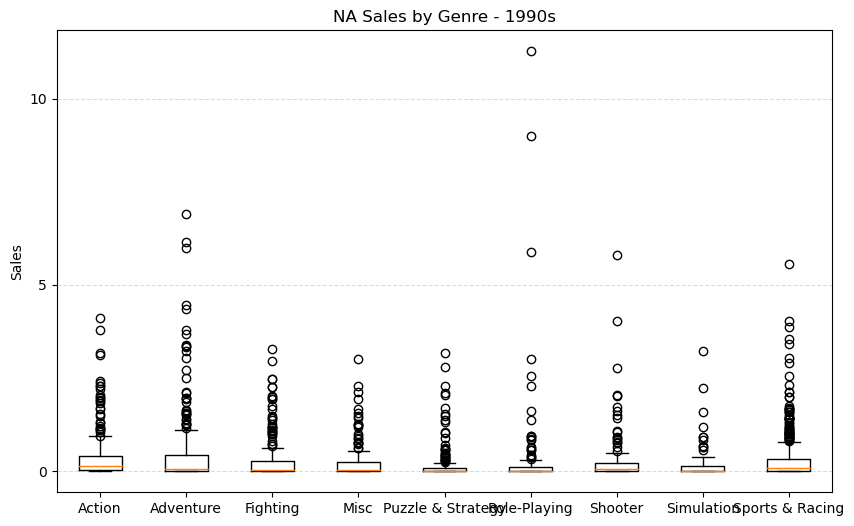

In [23]:
#Data for the 1990s
sales_decade_1990 = sales_decade.loc[sales_decade["Decade"] == "1990s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows based by genre and NA_Sales
    sales_total = sales_decade_1990.loc[sales_decade_1990["Genre"] == genre, "NA_Sales"]
      
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
#Create a box plot for the data
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,15,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title("NA Sales by Genre - 1990s")
plt.show()

There were 1767 total Action games.
With an IQR of 0.24, there are 170 outliers that sold greater than 0.64 units.
9.6% of total Action games were outliers.

There were 1346 total Adventure games.
With an IQR of 0.19, there are 129 outliers that sold greater than 0.48 units.
9.6% of total Adventure games were outliers.

There were 453 total Fighting games.
With an IQR of 0.3, there are 44 outliers that sold greater than 0.76 units.
9.700000000000001% of total Fighting games were outliers.

There were 1204 total Misc games.
With an IQR of 0.21, there are 109 outliers that sold greater than 0.52 units.
9.1% of total Misc games were outliers.

There were 815 total Puzzle & Strategy games.
With an IQR of 0.11, there are 89 outliers that sold greater than 0.28 units.
10.9% of total Puzzle & Strategy games were outliers.

There were 806 total Role-Playing games.
With an IQR of 0.19, there are 94 outliers that sold greater than 0.48 units.
11.700000000000001% of total Role-Playing games were 

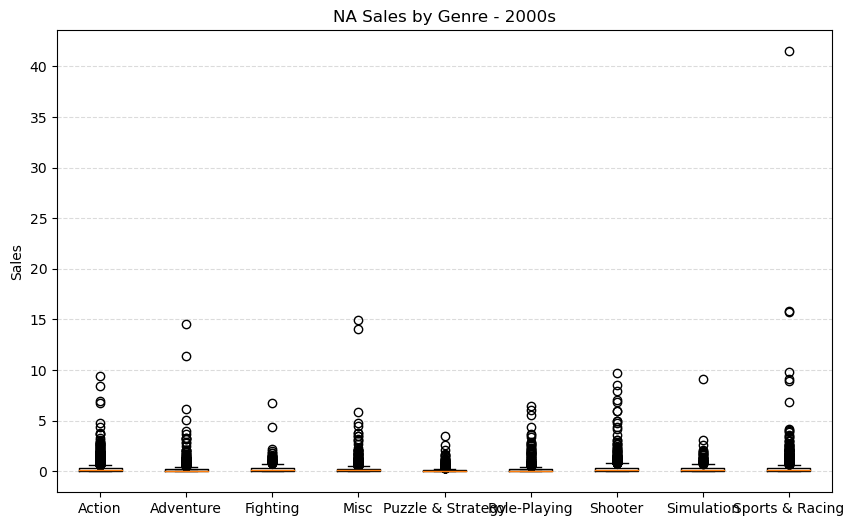

In [24]:
#Data for the 2000s
sales_decade_2000 = sales_decade.loc[sales_decade["Decade"] == "2000s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows based by genre and NA_Sales
    sales_total = sales_decade_2000.loc[sales_decade_2000["Genre"] == genre, "NA_Sales"]
          
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")
        
#Create a box plot for the data
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,45,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.title("NA Sales by Genre - 2000s")
plt.show()

There were 1094 total Action games.
With an IQR of 0.19, there are 121 outliers that sold greater than 0.48 units.
11.1% of total Action games were outliers.

There were 465 total Adventure games.
With an IQR of 0.07, there are 66 outliers that sold greater than 0.18 units.
14.2% of total Adventure games were outliers.

There were 143 total Fighting games.
With an IQR of 0.2, there are 12 outliers that sold greater than 0.5 units.
8.4% of total Fighting games were outliers.

There were 344 total Misc games.
With an IQR of 0.17, there are 31 outliers that sold greater than 0.43 units.
9.0% of total Misc games were outliers.

There were 176 total Puzzle & Strategy games.
With an IQR of 0.06, there are 19 outliers that sold greater than 0.15 units.
10.8% of total Puzzle & Strategy games were outliers.

There were 413 total Role-Playing games.
With an IQR of 0.15, there are 53 outliers that sold greater than 0.38 units.
12.8% of total Role-Playing games were outliers.

There were 282 total

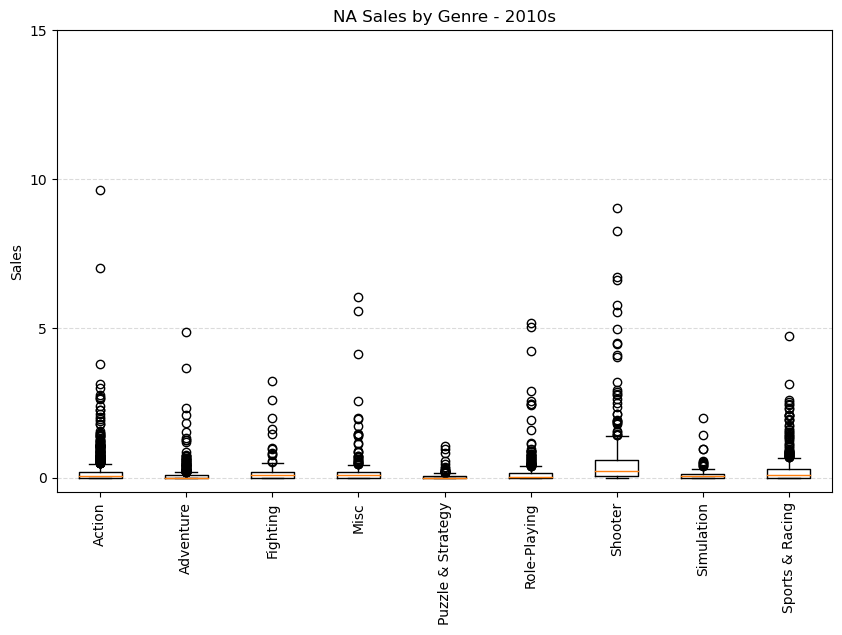

In [25]:
#Data for the 2010s
sales_decade_2010 = sales_decade.loc[sales_decade["Decade"] == "2010s"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
genre_total_list = []

for genre in genre_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sales_total = sales_decade_2010.loc[sales_decade_2010["Genre"] == genre, "NA_Sales"]
          
    # add subset 
    genre_total_list.append(sales_total)
    
    # Determine outliers using upper and lower bounds
    quartiles = sales_total.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = sales_total.loc[(sales_total < lower_bound) | (sales_total > upper_bound)]
    if outliers.empty:
        print(f"There were {len(sales_total)} total games")
        print(f"With an IQR of {round(iqr,2)}, there were no potential outliers.")
    else: 
        print(f"There were {len(sales_total)} total {genre} games.")
        print(f"With an IQR of {round(iqr,2)}, there are {len(outliers)} outliers that sold greater than {round(upper_bound,2)} units.")
        print(f"{round(len(outliers)/len(sales_total),3)*100}% of total {genre} games were outliers.\n")

#Create a box plot for the data
plt.figure(figsize=(10,6))
plt.boxplot(genre_total_list, labels = genre_name)
plt.ylabel('Sales')

plt.yticks(np.arange(0,16,5))
plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.8)
plt.xticks(rotation=90)
plt.title("NA Sales by Genre - 2010s")
plt.show()